In [104]:
import scipy.io
import os
import random
import numpy as np
from scipy.spatial.distance import hamming
import matplotlib.pyplot as plt
from scipy.stats import norm

In [63]:
person01 = scipy.io.loadmat('person01.mat')
person02 = scipy.io.loadmat('person02.mat')

In [64]:
person01_iriscode = person01['iriscode']

In [65]:
print(len(person01['iriscode']))

20


In [66]:
r1 = person01_iriscode[3]
r2 = person01_iriscode[5]
h_d = hamming(r1,r2)
print(h_d)

0.06666666666666667


In [67]:
# data holding iris code for everyone
data = {}

# depends on where the notebook locates, it might be useful
# not in this case tho
directory = 'Assignment-1/Task_2/'

# loop through file names
for ppl in range(1,21):
    filename = f'person{ppl:02}.mat'
    # change if the notebook is located differently
    path = os.path.join(filename)
    
    # load .mat files, isolate iris code
    mat_dict = scipy.io.loadmat(path)
    mat_iris = mat_dict['iriscode']
    
    # each person has a 20 by 30 matrix
    data[f'person{ppl:02}'] = mat_iris

In [68]:
num_people = len(data)
size_sample = 1000

In [69]:
# HD_S holding 1000 HD values for each person
HD_S = np.zeros((num_people, size_sample))

# loop through each person
for ppl in range(1,num_people+1): 
    iriscode = data[f'person{ppl:02}']
    
    # loop through 1000 times comparisons
    for i in range(0,size_sample):
        # get randomly two rows
        idx1, idx2 = random.sample(range(iriscode.shape[0]),2)
        row1 = iriscode[idx1]
        row2 = iriscode[idx2]
        
        # compute the hamming distance and append
        hamming_dist = hamming(row1,row2)
        HD_S[ppl-1, i] = hamming_dist
        

In [70]:
# HD_D holding 1000 HD values across all people
HD_D = np.zeros(size_sample)

# loop through 1000 times
for i in range(0, size_sample):
    # choose two random person
    ppl1, ppl2 = random.sample(range(1, num_people+1),2)
    iriscode1 = data[f'person{ppl1:02}']
    iriscode2 = data[f'person{ppl2:02}']
    # choose random row for each code
    idx1, idx2 = random.sample(range(iriscode1.shape[0]),2)
    row1 = iriscode1[idx1]
    row2 = iriscode2[idx2]
    
    # compute hamming distance
    hamming_dist = hamming(row1, row2)
    HD_D[i] = hamming_dist
    

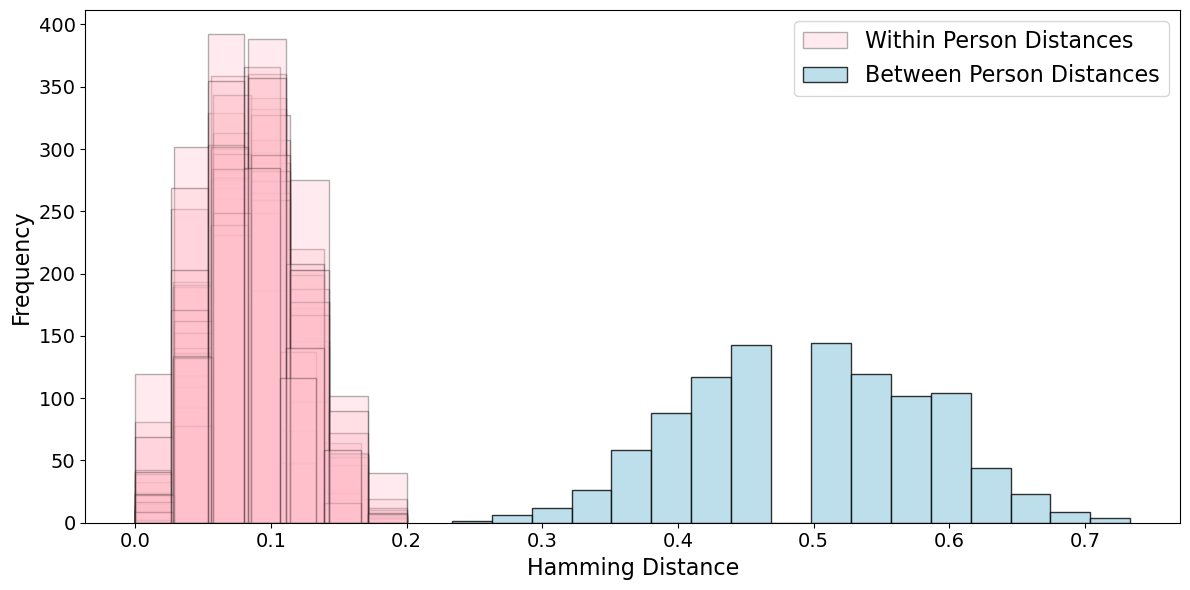

In [94]:
bin_width = 0.03

for i in range(1, num_people):
    range_of_data = np.max(HD_S[i] - np.min(HD_S[i]))
    num_bins = int(np.ceil(range_of_data/bin_width))

# plotting histogram
plt.figure(figsize=(12, 6))

range_of_data = np.max(HD_S[0] - np.min(HD_S[0]))
num_bins = int(np.ceil(range_of_data/bin_width))
plt.hist(HD_S[0], bins=num_bins, alpha=0.3, label='Within Person Distances', edgecolor='black', color='pink')
for i in range(1, num_people):
    range_of_data = np.max(HD_S[i] - np.min(HD_S[i]))
    num_bins = int(np.ceil(range_of_data/bin_width))
    plt.hist(HD_S[i], bins=num_bins, alpha=0.3, edgecolor='black', color='pink')
    
range_of_data = np.max(HD_D - np.min(HD_D))
num_bins = int(np.ceil(range_of_data/bin_width))
plt.hist(HD_D, bins=num_bins, alpha=0.8, label='Between Person Distances', edgecolor='black', color='lightblue')
plt.xlabel('Hamming Distance',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.legend(loc='upper right',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [101]:
mean_S = np.mean(HD_S)
var_S = np.var(HD_S)
mean_D = np.mean(HD_D)
var_D = np.var(HD_D)

In [102]:
print(mean_S,mean_D, var_S,var_D)

0.08470166666666668 0.4961 0.0015529054416666668 0.007799234444444444


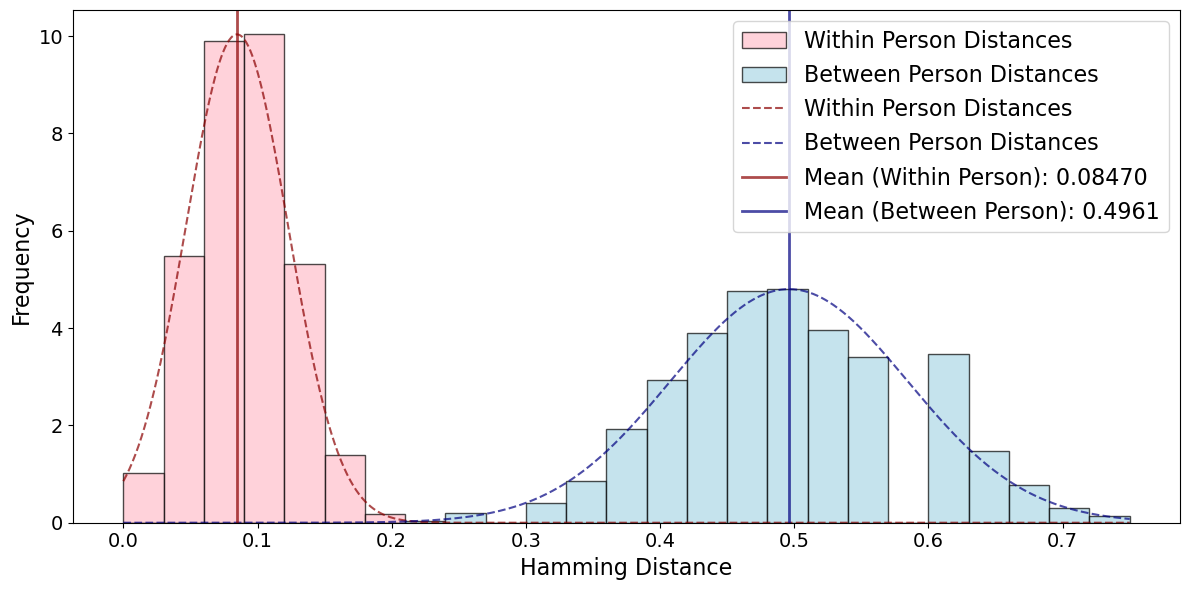

In [118]:
# Assuming HD_S and HD_D are already computed
bin_width = 0.03

# Calculate means and variances
mean_S = np.mean([np.mean(HD_S[i]) for i in range(num_people)])
var_S = np.mean([np.var(HD_S[i]) for i in range(num_people)])
mean_D = np.mean(HD_D)
var_D = np.var(HD_D)

# Define bin edges
bins = np.arange(min(np.min(HD_S), np.min(HD_D)), max(np.max(HD_S), np.max(HD_D)) + bin_width, bin_width)

# Compute histograms
hist_S, _ = np.histogram(np.concatenate(HD_S), bins=bins, density=True)
hist_D, _ = np.histogram(HD_D, bins=bins, density=True)

# Compute Gaussian curves
x = np.linspace(min(bins), max(bins), 1000)
pdf_S = norm.pdf(x, mean_S, np.sqrt(var_S))
pdf_D = norm.pdf(x, mean_D, np.sqrt(var_D))

# Scale the Gaussian curves
scale_S = np.max(hist_S) / np.max(pdf_S)
scale_D = np.max(hist_D) / np.max(pdf_D)

pdf_S_scaled = pdf_S * scale_S
pdf_D_scaled = pdf_D * scale_D

# Plot histogram and Gaussian curves
plt.figure(figsize=(12, 6))

# Plot histograms
plt.hist(np.concatenate(HD_S), bins=bins, alpha=0.7, label='Within Person Distances', edgecolor='black', color='pink', density=True)
plt.hist(HD_D, bins=bins, alpha=0.7, label='Between Person Distances', edgecolor='black', color='lightblue', density=True)

# Plot Gaussian curves
plt.plot(x, pdf_S_scaled, color='darkred', linestyle='--', label='Within Person Distances', alpha=0.7)
plt.plot(x, pdf_D_scaled, color='navy', linestyle='--', label='Between Person Distances', alpha=0.7)

# Add mean lines
plt.axvline(mean_S, color='darkred', linestyle='-', linewidth=2, label=f'Mean (Within Person): {mean_S:.5f}', alpha=0.7)
plt.axvline(mean_D, color='navy', linestyle='-', linewidth=2, label=f'Mean (Between Person): {mean_D:.4f}', alpha=0.7)


# Labels and formatting
plt.xlabel('Hamming Distance', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend(loc='upper right', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()